In [10]:
include("prorf.jl")
import .prorf as pf
using Printf

R = pf.RF("Data/rgpdata.fasta", "Data/rdata.xls")
RI = pf.RFI("Data/rgpdata.fasta", "Data/rdata.xls", 2:1:10, 100:10:500)
X, Y, L = pf.get_data(R, 9, 'E');

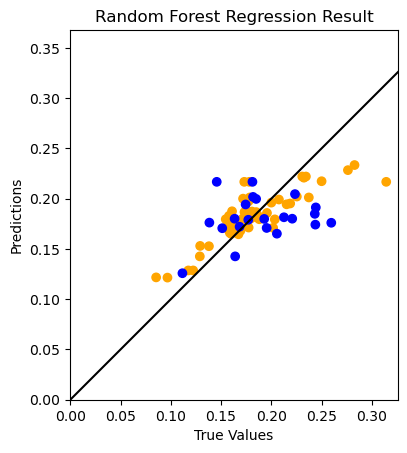

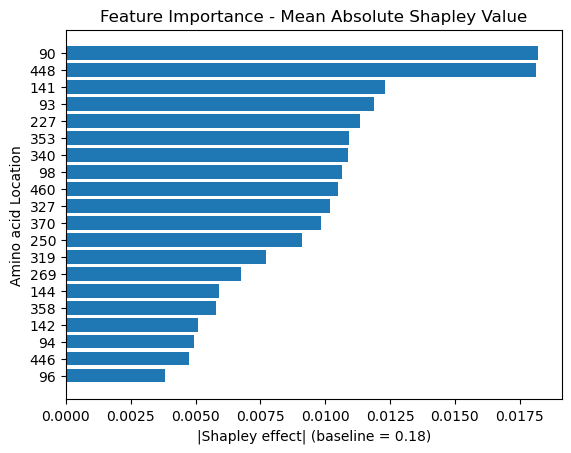

NRMSE : 0.263580


In [11]:
pf.get_reg_importance(R, X, Y, L, 6, 800);

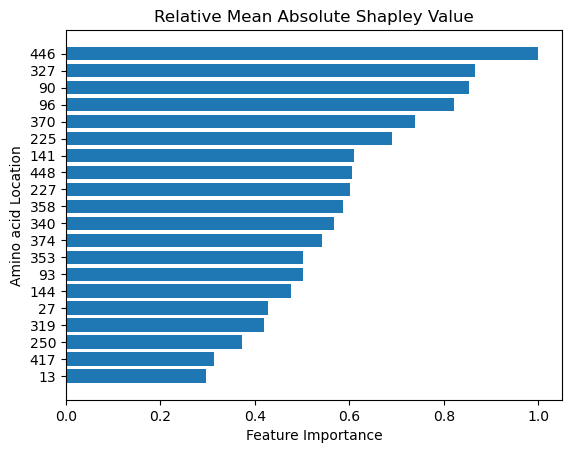

NRMSE : 0.119581


In [12]:
M, F = pf.get_reg_importance(R, X, Y, L, 3, 300, val_mode=true)
pf.view_importance(R, L, F)
@printf "NRMSE : %.6f\n" pf.nrmse(M, X, Y) # total NRMSE

# pf.get_reg_importance(R, X, Y, L, 3, 300, val_mode=false)

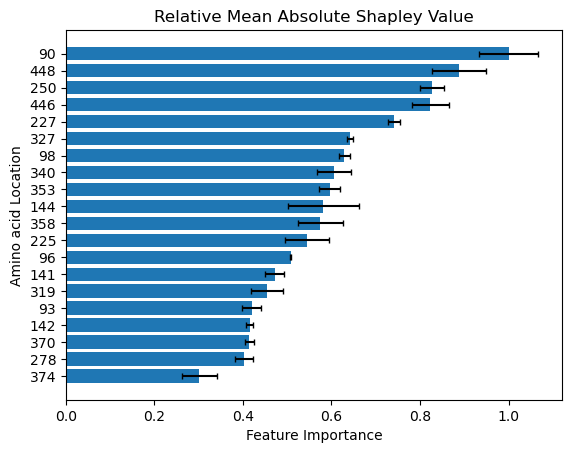

In [13]:
MF, SF = pf.iter_get_reg_importance(R, X, Y, L, 3, 700, 5, val_mode=true)
pf.iter_view_importance(R, L, MF, SF)
# pf.iter_get_reg_importance(R, X, Y, L, 3, 700, 5, val_mode=false)

In [14]:
for (fe, loc) in sort(collect(zip(MF, pf.get_amino_loc(R, L))), lt = (x, y) -> (x[1] > y[1]))[1:10]
    @printf "Location %s : %.4f\n" loc fe
end

Location 90 : 0.0135
Location 448 : 0.0120
Location 250 : 0.0112
Location 446 : 0.0111
Location 227 : 0.0100
Location 327 : 0.0087
Location 98 : 0.0085
Location 340 : 0.0082
Location 353 : 0.0081


Location 144 : 0.0079


In [15]:
Z = pf.get_reg_value(RI, X, Y, val_mode=true)
@printf "%d %d\n" pf.get_reg_value_loc(RI, Z)...

9 250


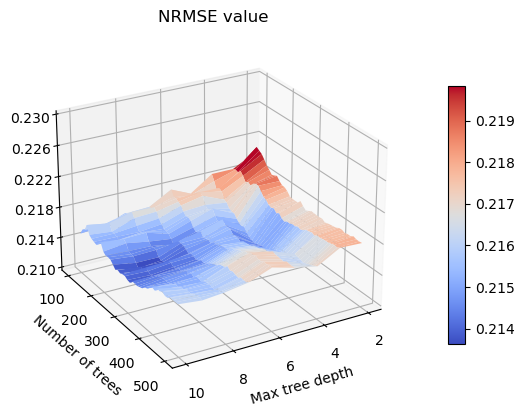

In [16]:
pf.view_reg3d(RI, Z, title="NRMSE value", azim=60, elev=25)
# azim : 방위각, elec : 고도

In [17]:
MZ, SZ = pf.iter_get_reg_value(RI, X, Y, 5, val_mode=true);

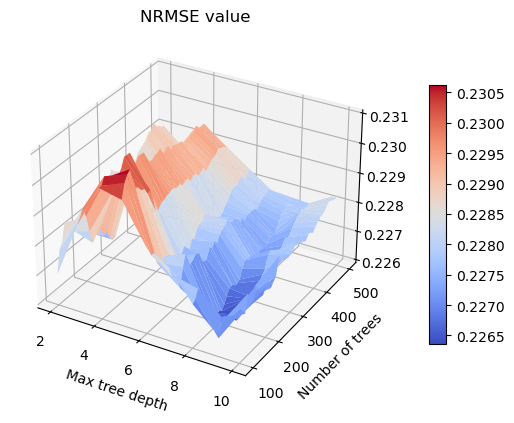

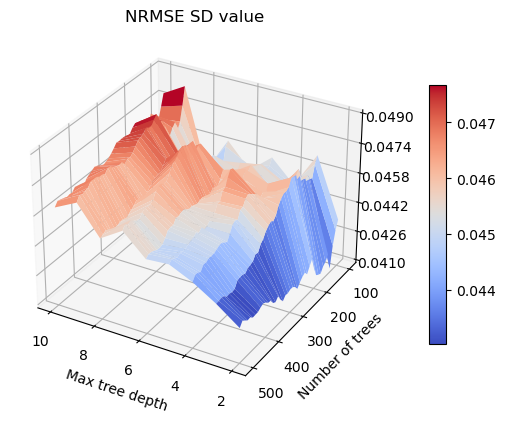

In [23]:
pf.view_reg3d(RI, MZ, title="NRMSE value", scale=3)
pf.view_reg3d(RI, SZ, title="NRMSE SD value", scale=3, azim=120)